In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
def generate_synthetic_data(n_samples=1000):
    """
    Generates a synthetic dataset for binary classification.

    Parameters:
    - n_samples: int, number of data points to generate.

    Returns:
    - df: pandas DataFrame, containing the features and target.
    """
    # Random seed for reproducibility
    np.random.seed(42)

    # Features
    age = np.random.randint(18, 65, n_samples)
    balance = np.random.randint(100, 50000, n_samples)
    duration = np.random.randint(50, 600, n_samples)
    campaign = np.random.randint(1, 10, n_samples)

    # Target (binary classification)
    subscribed = []
    for i in range(n_samples):
        if balance[i] > 20000 and duration[i] > 250:
            subscribed.append(1)
        else:
            subscribed.append(0)

    # Creating the DataFrame
    df = pd.DataFrame({
        'age': age,
        'balance': balance,
        'duration': duration,
        'campaign': campaign,
        'subscribed': subscribed
    })

    return df

# Generate and save the dataset
df = generate_synthetic_data(1000)
df.to_csv('synthetic_bank_marketing.csv', index=False)


In [3]:
df.head()

,age,balance,duration,campaign,subscribed
0,56,5387,367,3,0
1,46,34487,551,6,1
2,32,8612,430,9,0
3,60,1442,63,9,0
4,25,43436,553,7,1


**Exploratory Data Analysis**

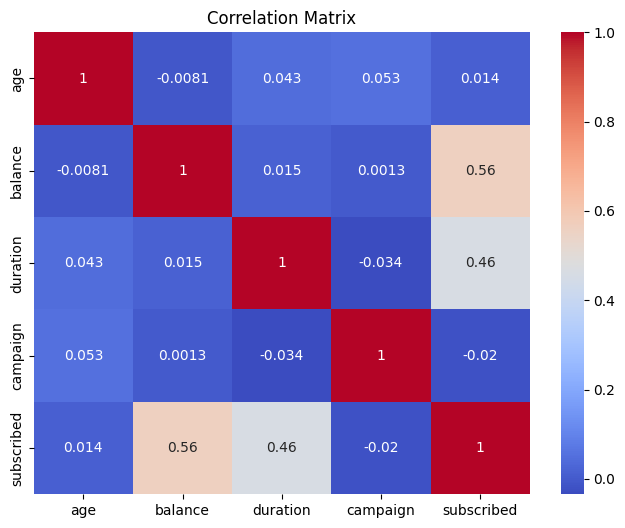

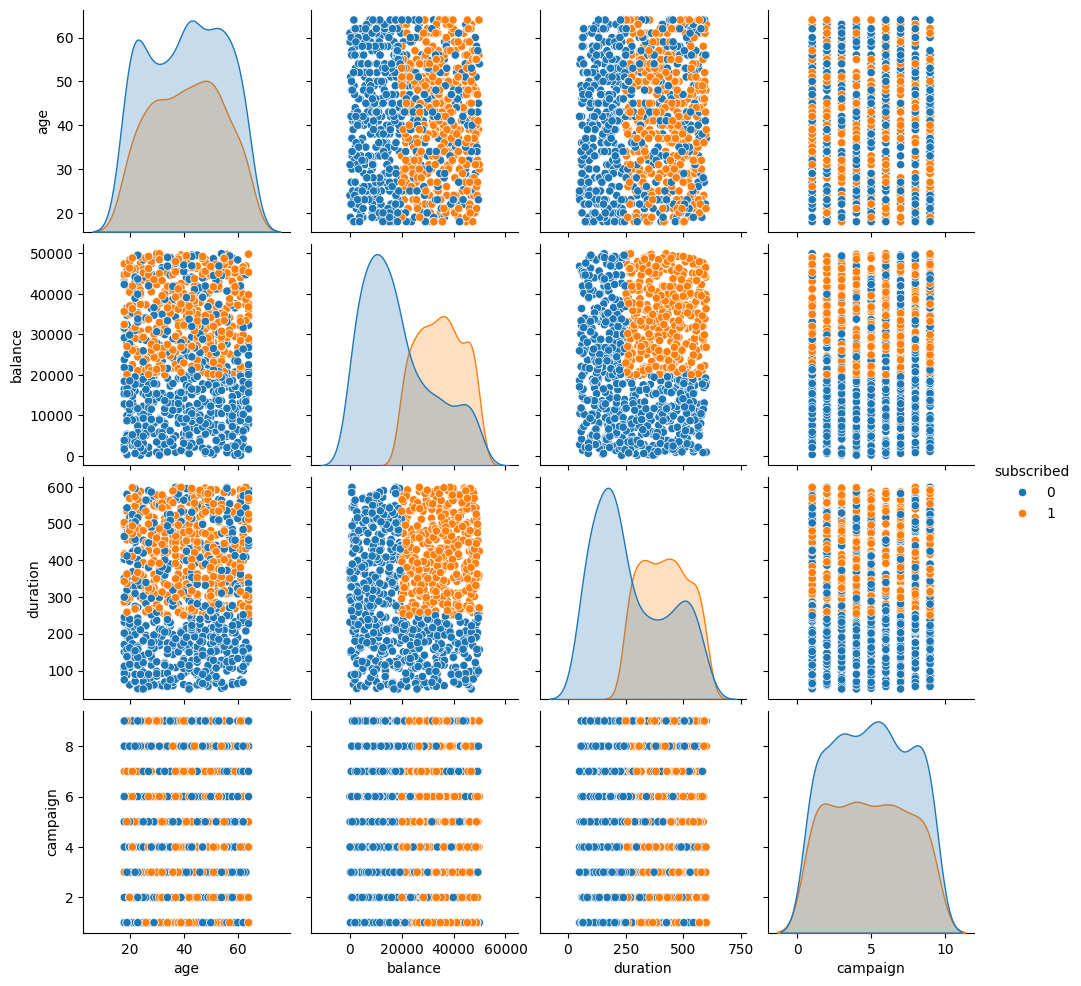

In [4]:
# Visualize correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing feature distributions
sns.pairplot(df, hue='subscribed', diag_kind='kde')
plt.show()


   age  balance  duration  campaign  subscribed
0   56     5387       367         3           0
1   46    34487       551         6           1
2   32     8612       430         9           0
3   60     1442        63         9           0
4   25    43436       553         7           1


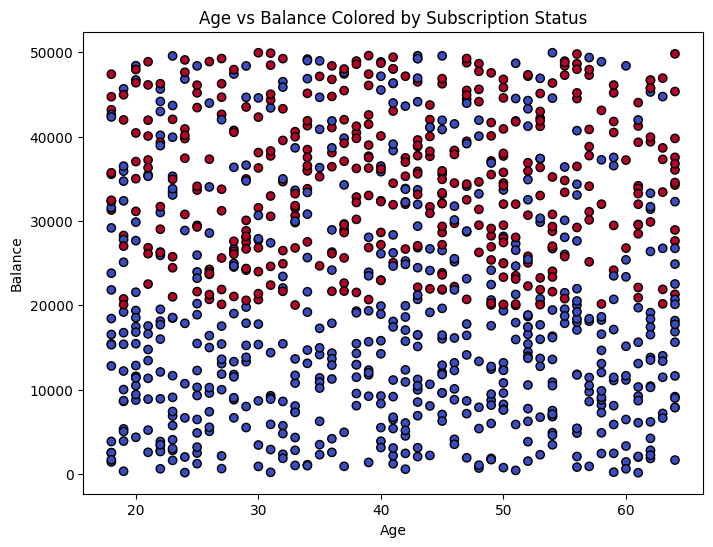

In [5]:
# Check the first few rows of the dataset
print(df.head())

# Plot the relationship between age, balance, and subscription status
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['balance'], c=df['subscribed'], cmap='coolwarm', edgecolors='k')
plt.title('Age vs Balance Colored by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


**Preprocessing the Data**

In [6]:
# Features and target
X = df[['age', 'balance']]
y = df['subscribed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train a Linear SVM Model**

In [7]:
# Initialize the Linear SVM model
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

**Make Predictions and Evaluate the Model**

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 73.00%
Confusion Matrix:
 [[132  43]
 [ 38  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       175
           1       0.67      0.70      0.68       125

    accuracy                           0.73       300
   macro avg       0.72      0.73      0.72       300
weighted avg       0.73      0.73      0.73       300



**Visualize the Decision Boundary**

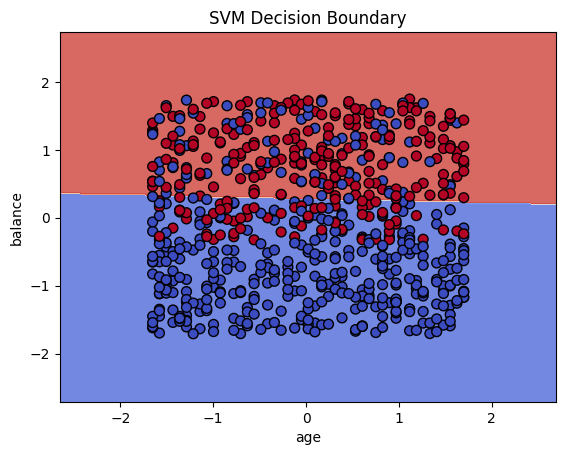

In [9]:
# Visualize the decision boundary (only with two features for simplicity)
def plot_decision_boundary(X, y, model, features):
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    Y_min, Y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(X_min, X_max, 0.02), np.arange(Y_min, Y_max, 0.02))
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contourf(XX, YY, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot the decision boundary
X_train_vis = X_train_scaled  # Use all the scaled data
plot_decision_boundary(X_train_vis, y_train.values, model, features=['age', 'balance'])


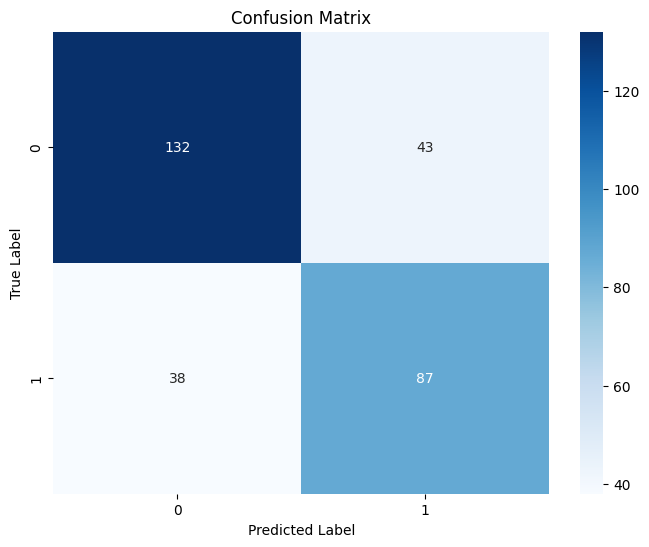

In [10]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [11]:
# Define the new point
new_point = np.array([[30, 25000]])

# Preprocess the new point (scale it)
new_point_scaled = scaler.transform(new_point)

# Predict the class of the new point
prediction = model.predict(new_point_scaled)

# Output the prediction
if prediction[0] == 1:
    print("The customer is predicted to subscribe.")
else:
    print("The customer is predicted NOT to subscribe.")


The customer is predicted NOT to subscribe.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
